# Prediction of WQI based on linear regression

### Packages used

In [1]:
#  import turicreate  esta libreria no existe para windows
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import turicreate_cross_validation.cross_validation as tcv
import numpy as np

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Loading Data

Routine freshwater monitoring data collected by the The WA State Department of Ecology's River and Stream Monitoring Program are summarized by a technique called the "Water Quality Index" (WQI). The WQI ranges from 1 (poor quality) to 100 (good quality). The WQI summary does not include non-standard elements like metals. For temperature, pH, oxygen, and fecal coliform bacteria, the WQI is based on criteria in Washington’s Water Quality Standards, WAC 173-201A. For nutrient and sediment measures where standards are not specific, results are based on expected conditions in a given region. Multiple constituents are combined and results aggregated over time to produce a single score for each station and each year. All current long-term Ecology monitoring stations with at least 5 years data are included. Most stations are located near the mouths of major streams. These stations integrate upstream water quality and capture large basin-scale trends. However, status and trends at these locations may not reflect status or trends in any particular sub-basin. Scores for individual parameters are presented as **Oxygen (Oxy) , pH, temperature (TEMP), total suspended sediment (TSS), turbidity(Turb), nitrogen(TPN), and phosphorus(TP).**

In [3]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# --- Load libraries -----------------------------------------------------------
data = pd.read_csv ('WQI_Parameter_Scores_1994-2013.csv')
# data=turicreate.SFrame('WQI_Parameter_Scores_1994-2013.csv')
data.head()

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   
2  16A070  Skokomish R nr Potlatch  1998.0           75      90       79   
3  16A070  Skokomish R nr Potlatch  1999.0           87      88       80   
4  16A070  Skokomish R nr Potlatch  2000.0           95      93       86   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   
2      88       61        90       98      71        49   
3      88       75        95      100      79        71   
4      96       84        90      100      84        87   

                  Location 1  
0  POINT (-123.1771 47.3098)  
1  POINT (-123.1771 47.3098)  
2  POINT (-123.1771 47.3098)  
3  POINT (-123.1771 47.3098)  
4  POINT (-123.1771 47.3098)

### Function to divide data into class

In [4]:
# clasificación de las aguas en categorias dependiendo del indice
data["quality"] = ""
for i in range(0,len(data)):
    if (data["Overall WQI"][i] <= 100) and (data["Overall WQI"][i] > 95):
        data["quality"][i] = "Excellent"
    elif (data["Overall WQI"][i] <= 94) and (data["Overall WQI"][i] > 80):
        data["quality"][i] = "Good"
    elif (data["Overall WQI"][i] <= 79) and (data["Overall WQI"][i] > 65):
        data["quality"][i] = "Fair"   
    elif (data["Overall WQI"][i] <= 64) and (data["Overall WQI"][i] > 45):
        data["quality"][i] = "Marginal"
    else :
        data["quality"][i] = "Poor"
 

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pa

In [5]:
# clasificación de las aguas 
data["quality_cat"] = -1
for i in range(0,len(data)):
    if (data["Overall WQI"][i] <= 100) and (data["Overall WQI"][i] > 95):
        data["quality_cat"][i] = 4
    elif (data["Overall WQI"][i] <= 94) and (data["Overall WQI"][i] > 80):
        data["quality_cat"][i] = 3
    elif (data["Overall WQI"][i] <= 79) and (data["Overall WQI"][i] > 65):
        data["quality_cat"][i] = 2   
    elif (data["Overall WQI"][i] <= 64) and (data["Overall WQI"][i] > 45):
        data["quality_cat"][i] = 1
    else :
        data["quality_cat"][i] = 0
 

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pa

In [6]:
data.head()

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   
2  16A070  Skokomish R nr Potlatch  1998.0           75      90       79   
3  16A070  Skokomish R nr Potlatch  1999.0           87      88       80   
4  16A070  Skokomish R nr Potlatch  2000.0           95      93       86   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   
2      88       61        90       98      71        49   
3      88       75        95      100      79        71   
4      96       84        90      100      84        87   

                  Location 1 quality  quality_cat  
0  POINT (-123.1771 47.3098)    Good            3  
1  POINT (-123.1771 47.3098)    Good            3  
2  POINT (-123.1771 47.3098)    Fair            2  
3  POINT (-123.1771 47.3098)    Good            3  
4  POINT (-123.1771 47.3098)    Poor            0

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


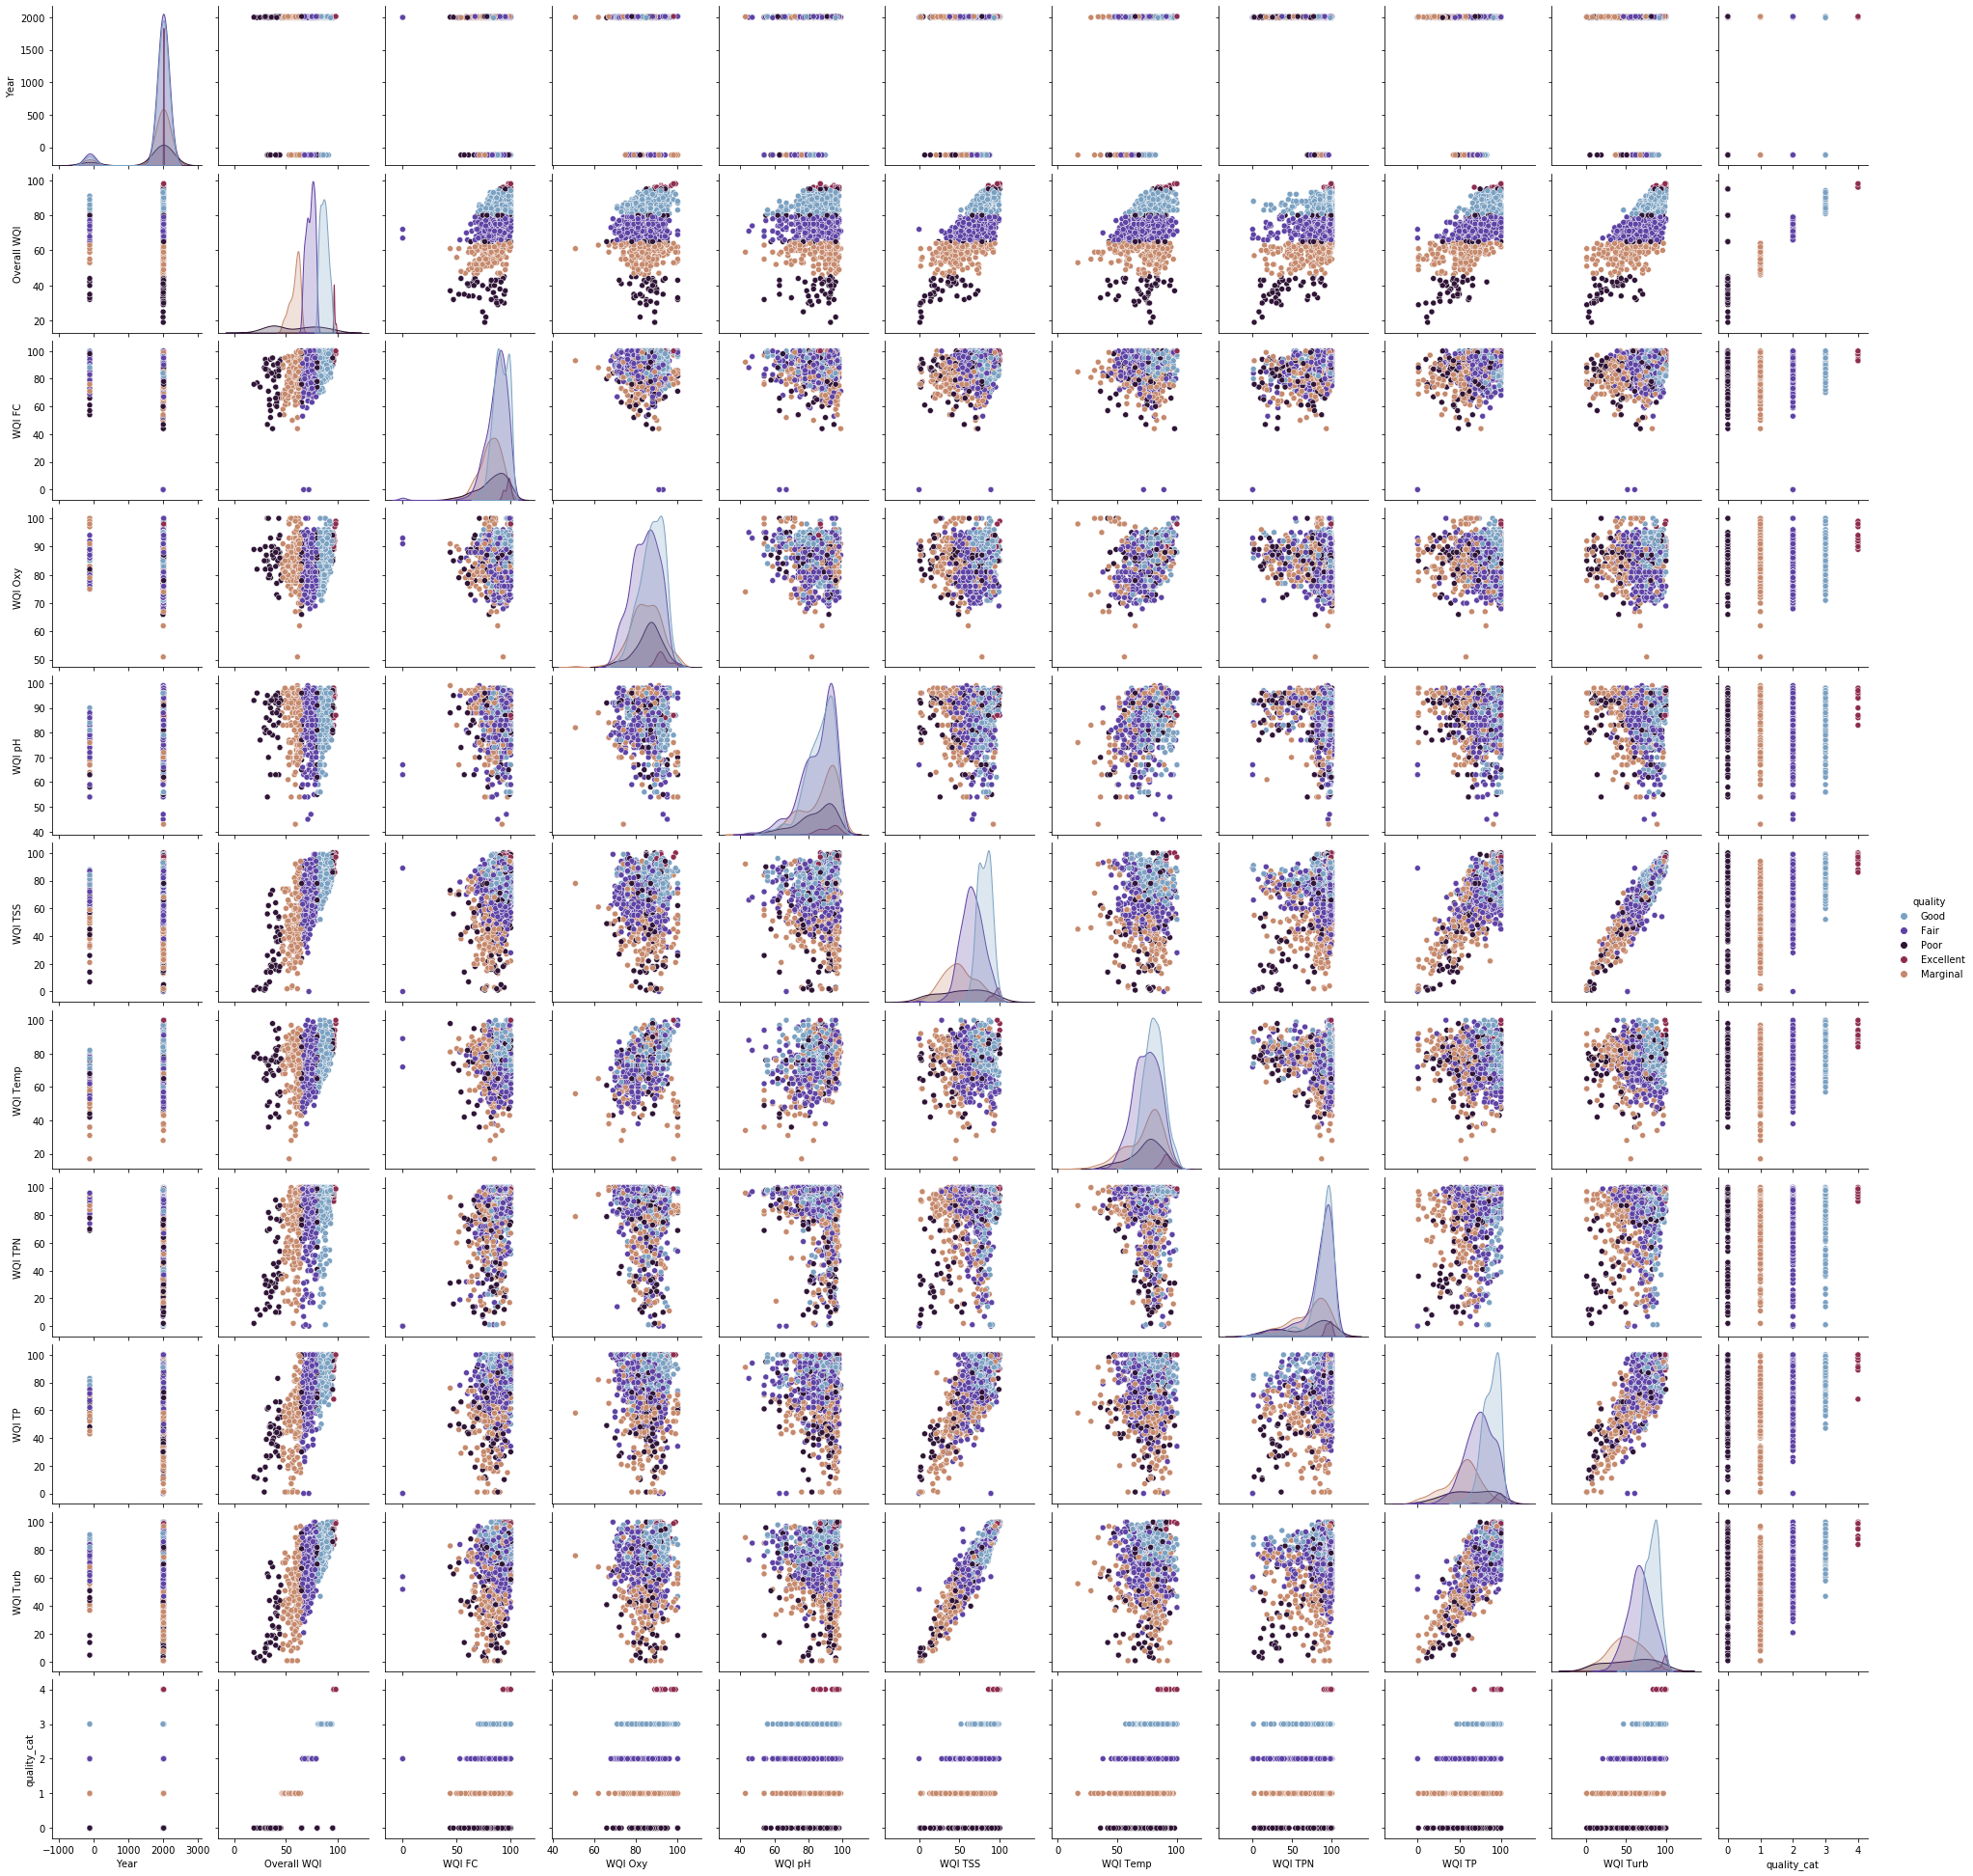

In [7]:
#Pairplot
import seaborn as sb
ax = sb.pairplot(data, hue="quality",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

In [8]:
# con plotly
import plotly.express as px
fig = px.scatter(data, x="WQI pH", y="Overall WQI")
fig.show()

In [9]:
# con plotly
import plotly.express as px
fig = px.scatter(data, x="WQI TPN", y="Overall WQI")
fig.show()

In [10]:
data.head(3)

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   
2  16A070  Skokomish R nr Potlatch  1998.0           75      90       79   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   
2      88       61        90       98      71        49   

                  Location 1 quality  quality_cat  
0  POINT (-123.1771 47.3098)    Good            3  
1  POINT (-123.1771 47.3098)    Good            3  
2  POINT (-123.1771 47.3098)    Fair            2

## Data visualization

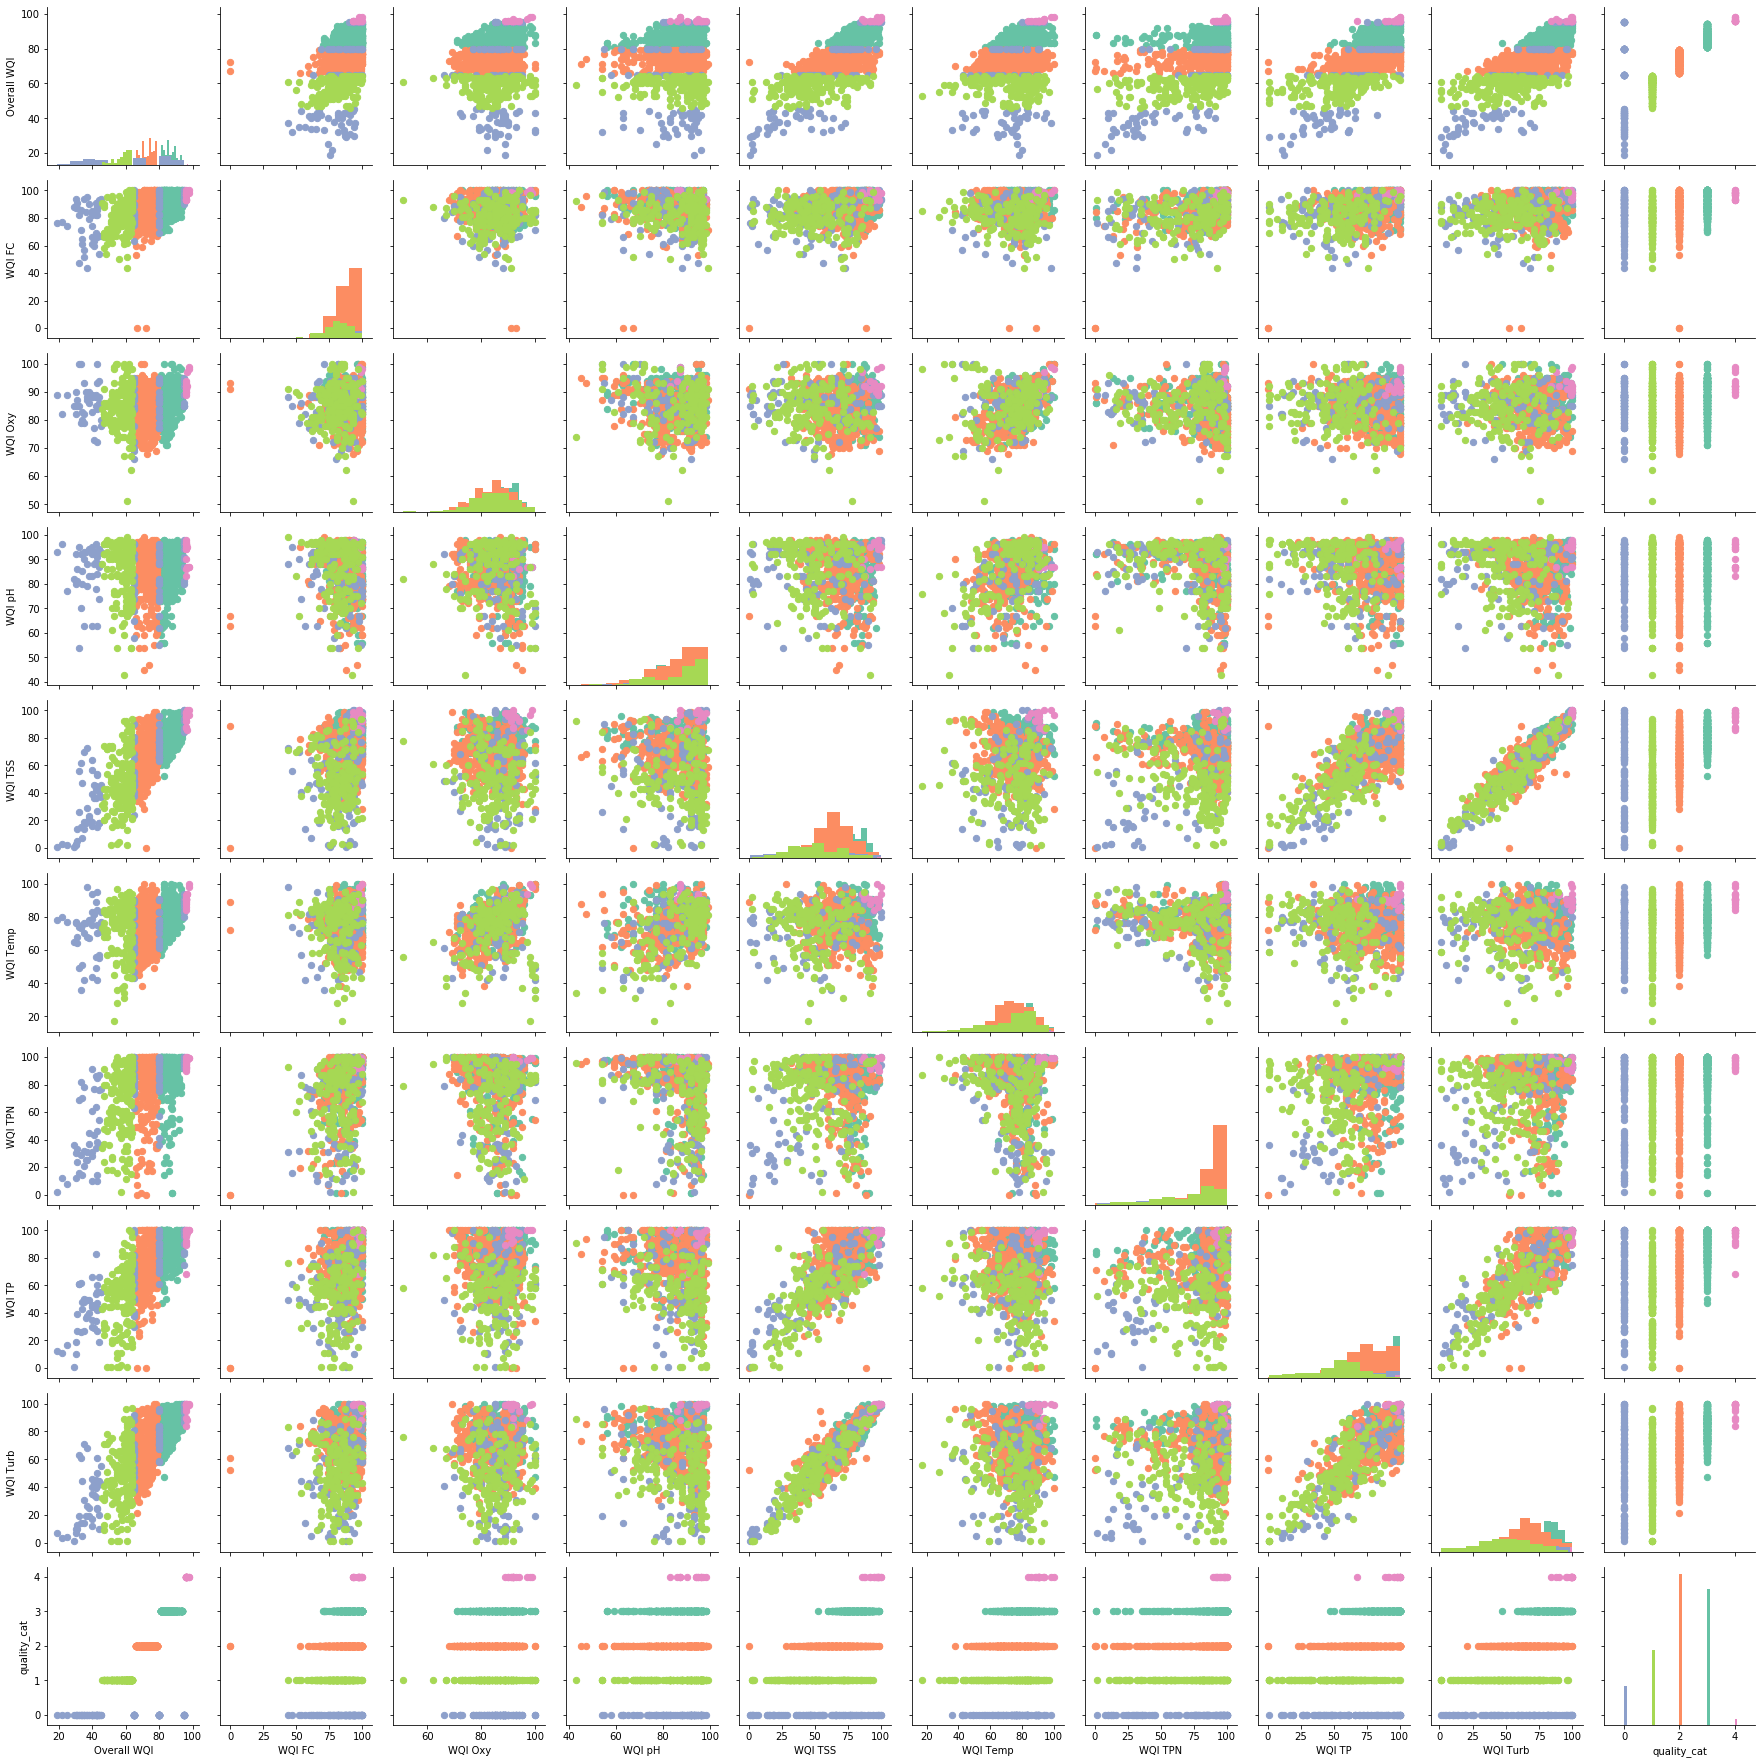

In [11]:
g=sns.PairGrid(data.iloc[:,3:15],hue = 'quality',palette="Set2")
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter,s=40)
plt.show()


In [12]:
data.isna().sum()

Station         0
Station Name    0
Year            0
Overall WQI     0
WQI FC          0
WQI Oxy         0
WQI pH          0
WQI TSS         0
WQI Temp        0
WQI TPN         0
WQI TP          0
WQI Turb        0
Location 1      0
quality         0
quality_cat     0
dtype: int64

In [13]:
data.head()

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   
2  16A070  Skokomish R nr Potlatch  1998.0           75      90       79   
3  16A070  Skokomish R nr Potlatch  1999.0           87      88       80   
4  16A070  Skokomish R nr Potlatch  2000.0           95      93       86   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   
2      88       61        90       98      71        49   
3      88       75        95      100      79        71   
4      96       84        90      100      84        87   

                  Location 1 quality  quality_cat  
0  POINT (-123.1771 47.3098)    Good            3  
1  POINT (-123.1771 47.3098)    Good            3  
2  POINT (-123.1771 47.3098)    Fair            2  
3  POINT (-123.1771 47.3098)    Good            3  
4  POINT (-123.1771 47.3098)    Poor            0

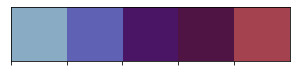

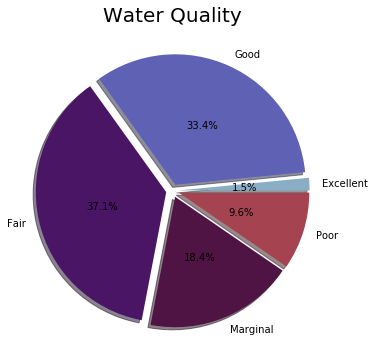

In [14]:
import seaborn as sb
colors = sb.color_palette('twilight')[0:5]
sb.palplot(colors)
labels = ["Excellent", "Good", "Fair", "Marginal", "Poor"]
data_list = [data['quality_cat'].value_counts()[4],
         data['quality_cat'].value_counts()[3],
        data['quality_cat'].value_counts()[2],
         data['quality_cat'].value_counts()[1],
        data['quality_cat'].value_counts()[0]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data_list, labels=labels,explode=[0.05]*5, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)  # explode=[0.05]*5 must 
plt.title("Water Quality", fontsize=20);
plt.show()

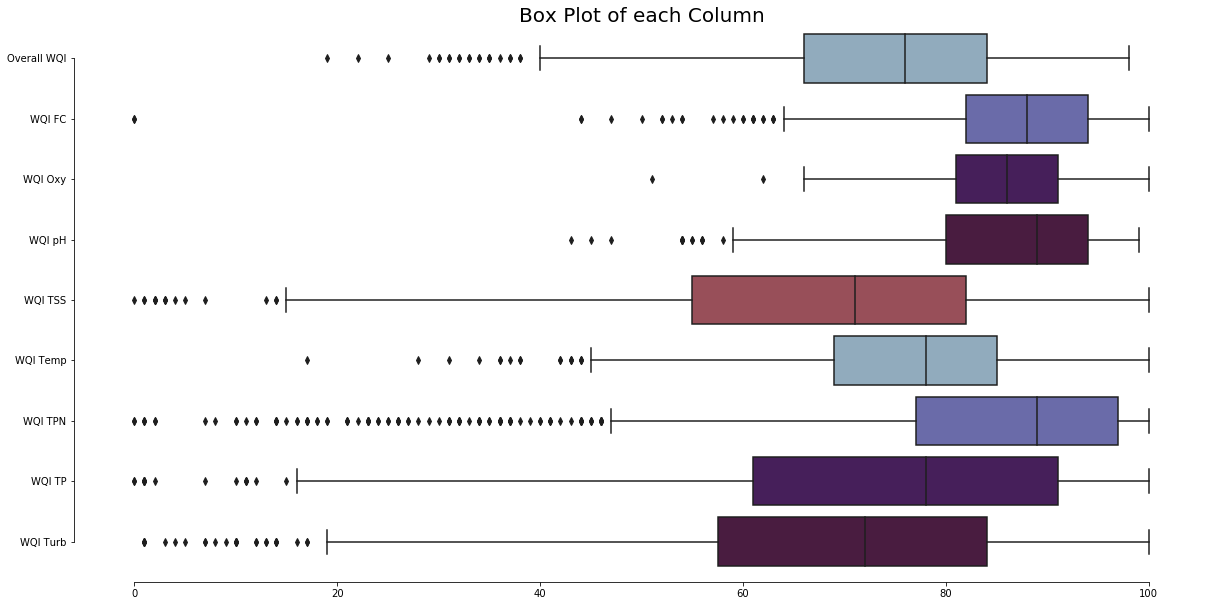

In [15]:
#Box Plot de cada columna de indices
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=data.drop(["quality", "quality_cat", "Year" ], axis=1), orient="h",palette = colors)
sb.despine(offset=10, trim=True)
plt.title("Box Plot of each Column", fontsize=20);
plt.show()

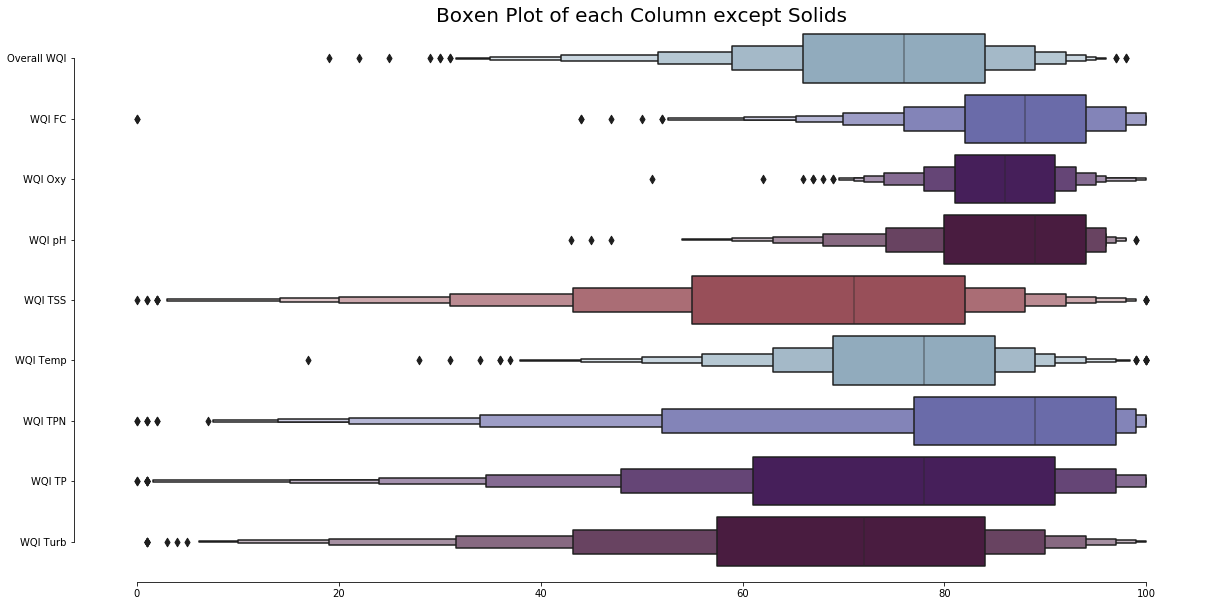

In [16]:
#Boxen Plot of each Column except Solids
df1 = pd.DataFrame()
df1 = data.copy()
df1 = df1.drop(["quality", "quality_cat", "Year" ],1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxenplot(data=df1, orient="h", palette=colors)
sb.despine(offset=10, trim=True)
plt.title("Boxen Plot of each Column except Solids", fontsize=20);
plt.show()

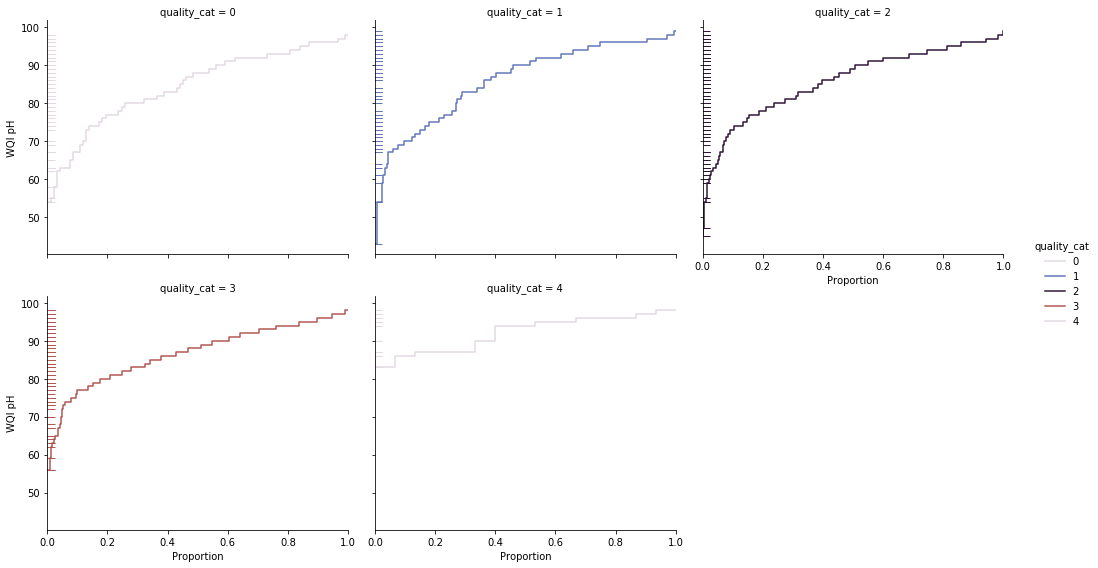

In [17]:
#Relation between ph and Potability
g = sb.displot(
    data=data.drop(["quality", "Year" ],1), y="WQI pH", hue="quality_cat", col="quality_cat", palette = "twilight", col_wrap=3,
    kind="ecdf", height=4, aspect=1.2,rug=True)

In [18]:
data.head(2)

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   

                  Location 1 quality  quality_cat  
0  POINT (-123.1771 47.3098)    Good            3  
1  POINT (-123.1771 47.3098)    Good            3

D:\ProgramData\Anaconda3\envs\prediccion\lib\site-packages\seaborn\distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'aspect'



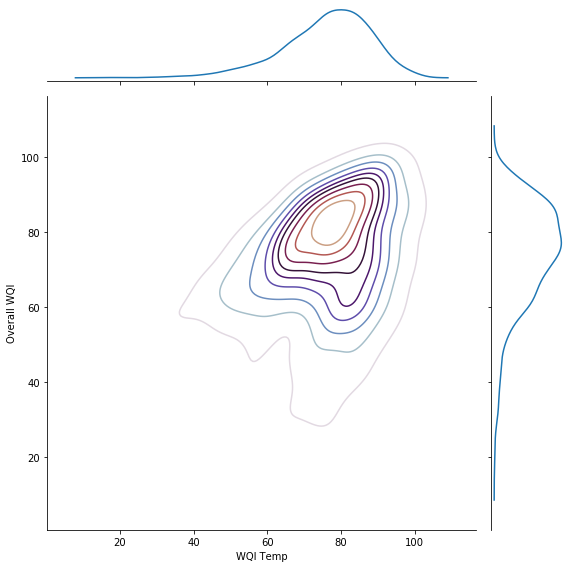

In [19]:
#Relation between Solids and Conductivity
g = sb.jointplot(x="WQI Temp", y="Overall WQI", data=data.drop(["quality", "Year" ],1), cmap = "twilight",
                 kind="kde",palette =colors, height =8, aspect=0.95)

In [20]:
# Sólo tenemos que normalizar las las INPUT
x = data.drop(["quality", "Overall WQI", "quality_cat","Year", "Station Name", "Station","Location 1" ],1)
y = data["quality_cat"]
x.head()
y.head()


0    3
1    3
2    2
3    3
4    0
Name: quality_cat, dtype: int64

In [21]:
data.head(3)

Station             Station Name    Year  Overall WQI  WQI FC  WQI Oxy  \
0  16A070  Skokomish R nr Potlatch  1996.0           87      91       85   
1  16A070  Skokomish R nr Potlatch  1997.0           86      78       84   
2  16A070  Skokomish R nr Potlatch  1998.0           75      90       79   

   WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb  \
0      95       78        81       99      84        69   
1      77       85        90       99      72        80   
2      88       61        90       98      71        49   

                  Location 1 quality  quality_cat  
0  POINT (-123.1771 47.3098)    Good            3  
1  POINT (-123.1771 47.3098)    Good            3  
2  POINT (-123.1771 47.3098)    Fair            2

## Normalizamos entre 0 y 1 

In [24]:
x = data.drop(["Overall WQI", "quality", "quality_cat","Station Name", "Year", "Station", "Location 1" ], axis=1)
y = data["Overall WQI"]
#pandas.DataFrame.rename(columns={'old_column_name':'new_column_name'})
y = y.rename({'Overall WQI':'WQI'}, axis=1)
#x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

# no se debe picklear un array como "scaled_array" sino el objeto FITEADO min_max_scaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# LE HACEMOS EL fit con los Datos ¡¡¡
min_max_scaler.fit_transform(x.values.astype(float))   # ENTRE 0 y 1

import pickle
# y lo serializamos para luego
with open('min_max_scaler.pkl', 'wb') as fid:
    pickle.dump(min_max_scaler, fid,2)
    
x.head(2)  

# AHORA Normalizamos entre 0 y 1


WQI FC  WQI Oxy  WQI pH  WQI TSS  WQI Temp  WQI TPN  WQI TP  WQI Turb
0      91       85      95       78        81       99      84        69
1      78       84      77       85        90       99      72        80

In [25]:
# LE HACEMOS EL fit con los INPUT ¡¡
min_max_scaler.fit_transform(x.values.astype(float))   # ENTRE 0 y 1

# y lo serializamos para luego, esto se usa para NORMALIZAR EL INPUT x 
with open('WQI-streamlit-app\min_max_scaler.pkl', 'wb') as fid:
    pickle.dump(min_max_scaler, fid,2)
    
    
min_max_scaler_cargado = pickle.load(open('min_max_scaler.pkl', 'rb'))

#-----------funcion normalizar data frame-------------------
def normalizar(algun_df):
    algun_df_norm = pd.DataFrame(min_max_scaler_cargado.transform(algun_df.values.astype(float)))

    algun_df_norm.columns = algun_df.columns
    return algun_df_norm    
#------------------------------------------

# vamos a ver si funciona normalizar del pickle
x_normalized = normalizar(x)
x_normalized.head()

# SERIALIZAMOS df1_normalized
with open('x_normalized_multi.pkl', 'wb') as fid:
    pickle.dump(x_normalized, fid,2)
         

# check
x_normalized.head()

# randomforest
x_norm_train , x_norm_test , y_train , y_test = train_test_split(x_normalized , y, test_size=0.25, random_state=42)

'''
pipelines = []
pipelines.append(('Scaled_logistic', Pipeline([('scaler', StandardScaler()),('linear', LogisticRegression())])))
pipelines.append(('Logistic', Pipeline([('linear', LogisticRegression())])))
pipelines.append(('Arbre', Pipeline([('arbre', RandomForestClassifier())])))
pipelines.append(('K-NN', Pipeline([('K-NN', KNeighborsClassifier())])))

for nombre, modelo in pipelines:
    a= cross_val_score(modelo, x_train, y_train, cv = 5, scoring = 'accuracy').mean()*100
    print("%s: %f " % (nombre, a))
'''
### Vemos que el modelo basado en Random Forest es el más preciso ¡
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees

# EL REGRESOR, NO CONFUNDIR CON EL CLASSIFIER ANTERIOR ¡¡¡
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_norm_train, y_train)

# asi hariamos una predicción sobre el primer registro de 
rf.predict([x_norm_test.iloc[0]])[0]
y_test.iloc[0]

# SERIALIZAMOS el modelo NORMALIZADO
with open('modelo_normalizado.pkl', 'wb') as fid:
    pickle.dump(rf, fid,2)

score = rf.fit(x_norm_train, y_train).score(x_norm_test, y_test)
print("score = ", score)

score =  0.9111161818416689


In [51]:
# COMPROBACION MANUAL DEL MODELO
x_normalized.iloc[3:10]
x.iloc[3:10]
y.iloc[3:10]
y.iloc[3:10]  # esto es el Overall WQI  que va de 0 a 100
# data.head(10)

print(rf.predict(min_max_scaler.transform(x.iloc[3:10])))
# y lo comparamos con los REALES
list(y.iloc[3:10])

[85.8   93.572 93.64  92.826 84.468 69.982 66.836]


[87, 95, 95, 94, 85, 70, 67]

### recordemos que x_norm_train y x_norm_test estan NORMALIZADOS ¡¡¡
### hacemos esta comprobación manual NOTANDO  que incluye a TODOS (TEST Y TRAIN) por tanto algunos de estos valores estan sobrefiteados por pertenecer a TRAIN.

In [53]:
for i in range(0,10):
    print(i,  "VALOR REAL OUTPUT ", y.iloc[i], "OUTPUT PREDICCIÓN", rf.predict(min_max_scaler.transform([x.iloc[i]]))[0] )


0 VALOR REAL OUTPUT  87 OUTPUT PREDICCIÓN 86.417
1 VALOR REAL OUTPUT  86 OUTPUT PREDICCIÓN 84.639
2 VALOR REAL OUTPUT  75 OUTPUT PREDICCIÓN 75.038
3 VALOR REAL OUTPUT  87 OUTPUT PREDICCIÓN 85.8
4 VALOR REAL OUTPUT  95 OUTPUT PREDICCIÓN 93.572
5 VALOR REAL OUTPUT  95 OUTPUT PREDICCIÓN 93.64
6 VALOR REAL OUTPUT  94 OUTPUT PREDICCIÓN 92.826
7 VALOR REAL OUTPUT  85 OUTPUT PREDICCIÓN 84.468
8 VALOR REAL OUTPUT  70 OUTPUT PREDICCIÓN 69.982
9 VALOR REAL OUTPUT  67 OUTPUT PREDICCIÓN 66.836


### clasificador en categorias y peso de las features en la prediccion

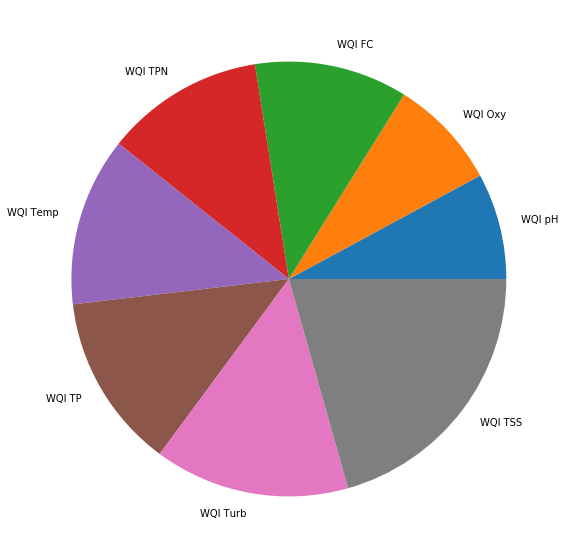

In [54]:
x = data.drop(["quality", "Overall WQI", "quality_cat","Year", "Station Name", "Station","Location 1" ],1)
y = data["quality_cat"]

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels)
plt.show()

In [55]:
importance # este es el peso de cada variable en la clasificación predictiva de quality_cat

Features  Importance
2    WQI pH    0.078926
1   WQI Oxy    0.082150
0    WQI FC    0.113893
5   WQI TPN    0.118084
4  WQI Temp    0.125594
6    WQI TP    0.130157
7  WQI Turb    0.145134
3   WQI TSS    0.206063

In [ ]:
pipelines = []
pipelines.append(('Scaled_logistic', Pipeline([('scaler', StandardScaler()),('linear', LogisticRegression())])))
pipelines.append(('Logistic', Pipeline([('linear', LogisticRegression())])))
pipelines.append(('Arbre', Pipeline([('arbre', RandomForestClassifier())])))
pipelines.append(('K-NN', Pipeline([('K-NN', KNeighborsClassifier())])))

for nombre, modelo in pipelines:
    a= cross_val_score(modelo, x_train, y_train, cv = 5, scoring = 'accuracy').mean()*100
    print("%s: %f " % (nombre, a))

In [ ]:
y_test.iloc[0]

### DATOS NO NORMALIZADOS 

In [56]:

modelo_RF = RandomForestClassifier()

#RandomForestClassifier()
x_train.iloc[0]
x_train.head()

### Vemos que el modelo basado en Random Forest es el más preciso ¡
# recordar que modelo_RF = RandomForestClassifier()
# Train the model on training data
modelo_RF.fit(x_train, y_train)
modelo_RF.predict([x_train.iloc[0]])

for i in range(0,10):
    #if y_test.iloc[i] == 1:
    print(i,  "VALOR REAL OUTPUT ", y_test.iloc[i], "OUTPUT PREDICCIÓN",  modelo_RF.predict([x_test.iloc[i]])[0] )
    #print(i, "INPUT= ", x_test.iloc[i], "VALOR REAL OUTPUT ", y_test.iloc[i], "OUTPUT PREDICCIÓN",  modelo_RF.predict([x_test.iloc[i]]) )
        # print(i, modelo_RF.predict([x_test.iloc[i]]))

0 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
1 VALOR REAL OUTPUT  2 OUTPUT PREDICCIÓN 3
2 VALOR REAL OUTPUT  1 OUTPUT PREDICCIÓN 1
3 VALOR REAL OUTPUT  1 OUTPUT PREDICCIÓN 1
4 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
5 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
6 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
7 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
8 VALOR REAL OUTPUT  3 OUTPUT PREDICCIÓN 3
9 VALOR REAL OUTPUT  2 OUTPUT PREDICCIÓN 2


### regresor RANDOM FOREST

In [57]:
data.head()
x_train.head()
y_train.head()

752    2
526    3
692    1
118    3
377    3
Name: quality_cat, dtype: int64

In [58]:
### Vemos que el modelo basado en Random Forest es el más preciso ¡
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees

# EL REGRESOR, NO CONFUNDIR CON EL CLASSIFIER ANTERIOR ¡¡¡
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)
rf.predict([x_train.iloc[0]])[0]

1.991

In [59]:
# performance
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), ' ')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.42  
Accuracy: -inf %.


In [ ]:
## Serializamos el modelo y  

In [ ]:
# lo serializamos para luego
with open('df1_multi.pkl', 'wb') as fid:
    pickle.dump(df1, fid,2)  
df1.head(1)

In [ ]:
correlation_matrix = data.corr().round(3)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data = correlation_matrix, annot = True, ax = ax, cmap = 'RdPu')

# Análisis PCA Principal component Analysis

In [ ]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
scaler.fit(x)
x_train_scaled = scaler.transform(x_train)  # ya normalizado
x_test_scaled = scaler.transform(x_test)   # ya normalizado

In [ ]:
plt.figure(1, figsize = (5, 5))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(x_scaler);

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_1.predict(data[data['Sl.no']==2])

In [ ]:
print(model_1.coefficients)

# Logistic Regression with L2 regularization

## Selecting L2 penalty via cross validation
We will implement a kind of cross-validation called k-fold cross-validation. This method involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. 
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. Turi Create has a utility function for shuffling a given SFrame. We reserve 20% of the data as the test set and shuffle the remainder. ( seed=1 is fixed to get consistent answer.)

In [ ]:
(train_valid, test) = data.random_split(.8, seed=0)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=0)
train_valid_shuffled[0:10]

In [ ]:
print (len(train_valid_shuffled))

# Exploring different L2 penalties

In [ ]:
main_features=['WQI FC',
 'WQI Oxy',
 'WQI pH',
 'WQI TSS',
 'WQI Temp',
 'WQI TPN',
 'WQI TP',
 'WQI Turb'
 ]

In [ ]:
table = turicreate.SFrame({'word': ['(intercept)'] + main_features})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [ ]:
L2_penalties=[0,0.05,0.2,1e2,1e5]

In [ ]:
model_2_1=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0,
                                                verbose=False)

coefficients_0_penalty=model_2_1.coefficients['value']

model_2_2=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0.05,
                                                  verbose=False)

coefficients_05_penalty=model_2_2.coefficients['value']

model_2_3=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0.2,
                                                  verbose=False)

coefficients_2_penalty=model_2_3.coefficients['value']


model_2_4=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=1e2,
                                                verbose=False)

coefficients_1e2_penalty=model_2_4.coefficients['value']

model_2_5=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=1e5,
                                                verbose=False)

coefficients_1e5_penalty=model_2_5.coefficients['value']


## Compare coefficients

We now compare the **coefficients** for each of the models that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

Below is a simple helper function that will help us create this table.

In [ ]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_05_penalty, 'coefficients [L2=0.05]')
add_coefficients_to_table(coefficients_2_penalty, 'coefficients [L2=0.2]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

In [ ]:
positive_words=table.sort('coefficients [L2=0]',ascending=False)[0:4]['word']
negative_words=table.sort('coefficients [L2=0]',ascending=True)[0:4]['word']
positive_words,negative_words

## Visualizing coefficients

In [ ]:
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':10}, columnspacing=0.5)
    plt.axis([0.5, 1e5, -1,1])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

In [ ]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 0.05, 0.2, 1e2, 1e5])

Shows that L2_penalties betwee 0 and 1 does good more or less

## Function for k-fold cross validation

In [ ]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    rss_sum=0

    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set=data[start:end+1]
        training_set=data[0:start].append(data[end+1:n])
        model = turicreate.linear_regression.create(training_set, target = output_name, features = features_list, 
                                                  l2_penalty=l2_penalty,
                                                  validation_set=None,verbose=False)
        predictions = model.predict(validation_set)
        residuals = validation_set['Overall WQI'] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
    validation_error = rss_sum / k # average = sum / size or you can use np.mean(list_of_validation_error)
    return validation_error  

In [ ]:
def evaluate(model):
    rss_sum=0
    residuals = train_data['Overall WQI'] - model.predict(train_data)
    rss = sum(residuals * residuals)
    rss_sum += rss
    train_error = rss_sum/10
    return train_error

In [ ]:
train_error = {}
train_error[0]   = evaluate(model_2_1)
train_error[0.05] = evaluate(model_2_2)
train_error[0.2]  = evaluate(model_2_3)
train_error[1e2] = evaluate(model_2_4)
train_error[1e5] = evaluate(model_2_5)
validation_error = {}
validation_error[0]   =k_fold_cross_validation(10,0, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[0.05]   =k_fold_cross_validation(10,0.05, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[0.2]  = k_fold_cross_validation(10,0.2, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[1e2] = k_fold_cross_validation(10,1e2, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[1e5] = k_fold_cross_validation(10,1e5, train_valid_shuffled, 'Overall WQI', main_features)

In [ ]:
train_error

In [ ]:
validation_error

In [ ]:
# a simple report
for key in sorted(validation_accuracy.keys()):
    print("L2 penalty = %g" % key)
    print("train error = %s, validation_error = %s" % (train_error[key], validation_error[key]))
    print("--------------------------------------------------------------------------------")

In [ ]:
# Ploting error on training and validation sets over choice of L2 penalty.
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'bo-', linewidth=4, label='Training error')
sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'ro-', linewidth=4, label='Validation error')
plt.xscale('symlog')
plt.axis([0, 1e5, 2000, 8000])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout

l2_penalty =0.2 performs best as we can see after observing validaton error

In [ ]:
l={}
l[1]=model_2_1.evaluate(test_data)
l[2]=model_2_2.evaluate(test_data)
l[3]=model_2_3.evaluate(test_data)

In [ ]:
l

**The max_error of our model is 35.048622708184176 and it's 'rmse' is  6.42200646793368 which is pretty decent**


Since the coefficients are more or less same, Ridge regression is not required.Still an l2_penalty between 0.2-0.05 gives best results.  

# Model Using Logistic Classifier

This is a multiple class problem and can be solved using logistic regression.
**Based on designations set by CCME(2005) to classify water based on WQI.**
```
Excellent     95-100     All measurements are within objectives virtually all of the time
```
```
Good          80-94      Conditions rarely depart from natural or desirable levels
```
```
Fair          65-79      Conditions sometimes depart from natural or desirable levels
```
```
Marginal      45-64      Conditions often depart from natural or desirable levels
```
```
Poor           0-44      Conditions usually depart from natural or desirable levels**
```

In [ ]:
model_3=turicreate.logistic_classifier.create(train_data, target = 'quality', features = main_features, 
                                                  l2_penalty=0.05,
                                                  verbose=False)

In [ ]:
model_3.evaluate(test_data)

As we can see logistic regression does horribly on this problem,**mainly because the data set is highly unbalanced** 

## Precision and Recall

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

In [ ]:
precision_1 = model_3.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision_1)

A complementary metric i.e **recall**, which measures the ratio between the number of true positives and that of ground-truth:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$



In [ ]:
recall_1 = model_3.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall_1)

In [ ]:
model_3.predict_topk(test_data,output_type='probability')

**As we can see precision recall values are not up to the mark,does pretty average**

# Model using Decision Trees

In [ ]:
model_4=turicreate.decision_tree_classifier.create(train_data, target = 'quality', features = main_features,max_depth=9)

In [ ]:
model_4.evaluate(test_data)

In [ ]:
precision_2 = model_4.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision_1)

In [ ]:
recall_2 = model_4.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall_1)

**Boosted Decision Trees performs equally poor on the data**